## Assignment 1
#### Computational Applied Statisctics
#### Andres Urrego Angel

This analytical report is based in a dataset called income.csv that contains information about how the education years and the seniority can impact in the income for employees.

The report is spread in the following approaches:
* Analyze the dataset (variables, measures, data)
* Predict salary based on years of education (linear regression)
* PLot graph of income vs education
* Prediction of income based in Education and Seniority
* Conclusion

#### Explore dataset:

In [1]:
import pandas as pd
import numpy as np

#Exploration stage fro the dataset Income

income = pd.read_csv('ycbs255/jupyter/data/Income2.csv')  # Load the data from the source file

print('Sample data verification to recognize variables(predictors) and the target:')
print(income.sample(n=10))  # check a sample data 
print('*'*60)
print('Few data measures to check out the mean, stnd, min, max, etc.:')
print(income.describe())   # Verify a few measures, is remarkable the mean for the goal column Income
print('*'*60)
print('The target mean is: {}'.format(np.mean(income['Income']))) # Confirm the mean for the Y (target) with numpy

Sample data verification to recognize variables(predictors) and the target:
    Unnamed: 0  Education   Seniority     Income
21          22  14.551724  137.931034  53.532106
8            9  20.344828   88.275862  90.006327
24          25  21.586207   20.000000  78.805784
18          19  16.620690  175.172414  70.105096
12          13  11.655172   20.000000  27.982505
13          14  16.620690   94.482759  66.601792
0            1  21.586207  113.103448  99.917173
14          15  10.000000  187.586207  41.531992
25          26  11.241379   44.827586  21.388561
1            2  18.275862  119.310345  92.579135
************************************************************
Few data measures to check out the mean, stnd, min, max, etc.:
       Unnamed: 0  Education   Seniority     Income
count   30.000000  30.000000   30.000000  30.000000
mean    15.500000  16.386207   93.862069  62.744733
std      8.803408   3.810622   55.715623  27.013285
min      1.000000  10.000000   20.000000  17.613593
2

#### Prediction of Salary:
Based on years of education I deploy a model based in a linear regression to predict the behavior of income. For this prediction the value of Eduction in terms of years is 18.



In [2]:
from sklearn.linear_model import LinearRegression

# Build model
lr = LinearRegression()
lr.fit(X = income[ ['Education'] ], y = income['Income'])

# Entry the years education value for prediction
x = np.array([18] )

# Get prediction outcome
print('The value of income when Education years is 18 rise: {}'.format(lr.predict(x.reshape(1,1))))

The value of income when Education years is 18 rise: [ 73.0522897]


#### Plot graph for education Vs Income
I have created a plot to validate the relation between the predictor years of education and income in order to verify the dispertion points and the behavior of the model linear regression.

the value of intercepter in the model is:-41.91661220978736
the value of coefition for the model is:[ 6.38716122]


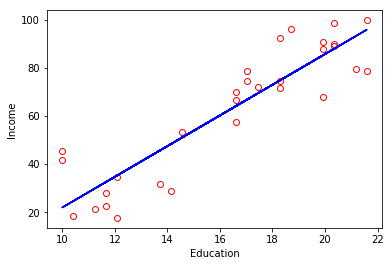

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# BUild the linear regression model

lr = LinearRegression()
lr.fit(X = income[ ['Education'] ], y = income['Income'])
print('the value of intercepter in the model is:{}'.format(lr.intercept_))
print('the value of coefition for the model is:{}'.format(lr.coef_))

# Plot visualization 
plt.plot(income.Education, income.Income, 'or', mfc='none');

# add a regression line
plt.plot(income.Education, lr.intercept_+lr.coef_*income.Education, "-b");
plt.xlabel('Education');
plt.ylabel('Income');

I want to get a heatmap of correlation among the predictors 'Seniority' and 'Education' Vs the target 'Income'.Therefore I have created a the map with a fucntion called matshow() in **matplotlib**. The relation among 'Senitority' and 'Income' is stronger and this is why the green color among these two variables is more remarkable.

([<matplotlib.axis.YTick at 0x7fdec77d3c18>,
 <a list of 4 Text yticklabel objects>)

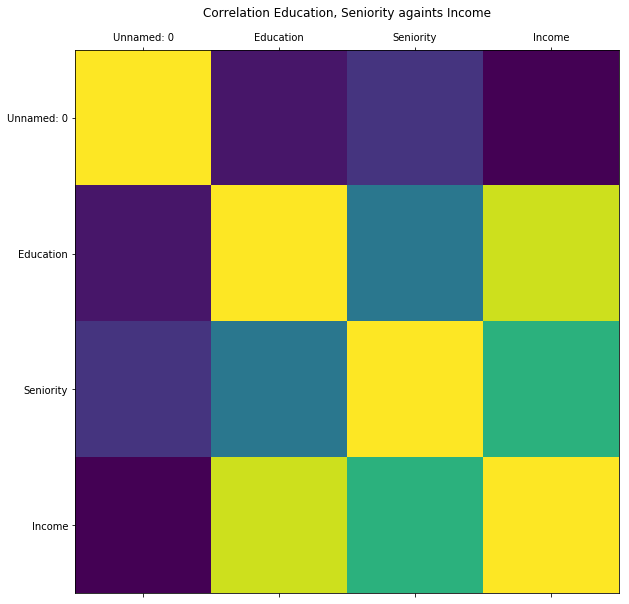

In [8]:
#Correlation
corr = income.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(corr)

plt.title('Correlation Education, Seniority againts Income')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)


#### Prediction based in Seniority and  Education
In  this prediction I deploy the regression model for two predictors 'Seniority' and 'Education'. Finally I get a new  prediction. Whithin the prediction I include a first execution when the seniority is greater and then when the weight is more on education.

The results are slightly different get greater weight on the second execution when the Education is slightly greater.

In [ ]:
lr = LinearRegression()
lr.fit(X = income[ ['Education' , 'Seniority']], y = income['Income'])
x = np.array([19,50]) # greater the predictor Seniority than Education
z = np.array([20,18]) # greater the predictor Education than Seniority
print('The value of income when the seniority is greater: {}'.format(lr.predict(x.reshape(1,2))))
print('The value of income whit a greater education: {}'.format(lr.predict(z.reshape(1,2))))

### Conclusion

After the exploration of the dataset and deployment of a regression model to predict the behavior of the target income. Is very remarkable that although the correlation dicts that the predictor **seniority** is heavier that **education** the prediction of the model not match completely with this statement due the income was slightly greater when the education is larger.

In the other hand, is complicated  aim all the confidence in a model with just 30 observations to predict a target. In this case would be required extend greater the observations for the dataset in order to make smarter the model and likely more accurate.
